## Data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('crime.csv')

Dropping these columns as we won't be using them in our analysis

In [3]:
data.drop(['MINUTE', 'HUNDRED_BLOCK', 'X','Y'], axis = 1, inplace = True)
data['NEIGHBOURHOOD'].fillna('N/A', inplace=True)

Creating a DATE variable and using it as the index

In [4]:
data['DATE'] = pd.to_datetime({'year': data['YEAR'], 'month': data['MONTH'], 'day': data['DAY']})
data = data.sort_values(['DATE'])
data['Day of Week'] = data['DATE'].dt.dayofweek
data.index = pd.DatetimeIndex(data['DATE'])
data.head(10)

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD,Latitude,Longitude,DATE,Day of Week
DATE,,,,,,,,,,
2003-01-01,Offence Against a Person,2003,1,1,NaN,N/A,0.000000,0.000000,2003-01-01,2
2003-01-01,Offence Against a Person,2003,1,1,NaN,N/A,0.000000,0.000000,2003-01-01,2
2003-01-01,Mischief,2003,1,1,18.0,Central Business District,49.283857,-123.106363,2003-01-01,2
2003-01-01,Other Theft,2003,1,1,18.0,Central Business District,49.281898,-123.120738,2003-01-01,2
2003-01-01,Theft of Vehicle,2003,1,1,23.0,Kensington-Cedar Cottage,49.237564,-123.071217,2003-01-01,2
2003-01-01,Theft from Vehicle,2003,1,1,19.0,Grandview-Woodland,49.263683,-123.069706,2003-01-01,2
2003-01-01,Theft from Vehicle,2003,1,1,21.0,Central Business District,49.279159,-123.113100,2003-01-01,2
2003-01-01,Theft of Vehicle,2003,1,1,5.0,Central Business District,49.276548,-123.119005,2003-01-01,2
2003-01-01,Break and Enter Commercial,2003,1,1,12.0,Renfrew-Collingwood,49.258843,-123.031937,2003-01-01,2


Since the dataset doesn't contain the full month of 2017-07 we're going to get rid of all observations past this point. We're extracting the last 5 rows to make sure that there are no more dates with 2017-07. We can also drop the DATE column after this because it's redundant.

In [5]:
data = data[data.DATE < '2017-07-01']
data.drop(['DATE'], axis = 1, inplace = True)
data.iloc[-5:]

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD,Latitude,Longitude,Day of Week
DATE,,,,,,,,,
2017-06-30,Theft from Vehicle,2017,6,30,21.0,South Cambie,49.253500,-123.123261,4
2017-06-30,Mischief,2017,6,30,19.0,West Point Grey,49.271403,-123.211865,4
2017-06-30,Break and Enter Commercial,2017,6,30,15.0,Fairview,49.266190,-123.141418,4
2017-06-30,Theft of Bicycle,2017,6,30,17.0,Kitsilano,49.266525,-123.157181,4
2017-06-30,Other Theft,2017,6,30,21.0,Renfrew-Collingwood,49.258164,-123.036950,4


Let's also add in a column "CATEGORY" to categorize the types of crime to make the plots looking for general trends a little more clear.

In [6]:
def category(crime_type):
    if 'Theft' in crime_type:
        return 'Theft'
    elif 'Break' in crime_type:
        return 'Break and Enter'
    elif 'Collision' in crime_type:
        return 'Vehicle Collision'
    else:
        return 'Others'
    
data['CATEGORY'] = data['TYPE'].apply(category)

Now our dataset is fully prepared and ready for analysis. The missing values we see are from violent crimes and since they lack so much data, we won't be using them in our more in depth analyses for neighbourhoods and time but we still want to keep them for analyses with total crime. 

## All Crime Throughout The Years

To get a general sense of the trend of total crime throughout the years, we made a stacked barplot to show the changes in total crime as well the category of crime from 2003 to 2016. We excluded 2017 as the full year isn't recorded in the data.

NameError: name 'title' is not defined

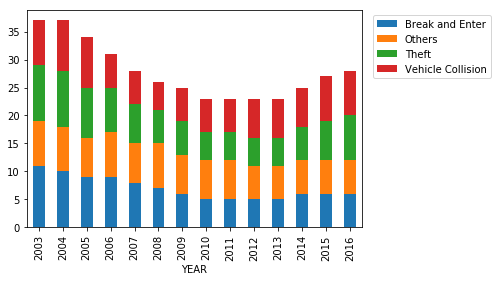

In [7]:
select = data.loc['2003-01-01':'2016-12-31',:]
crime_type_by_year = select.groupby(["CATEGORY", "YEAR"]).count()['MONTH']
crime_type_by_year_df = crime_type_by_year.unstack("CATEGORY")
w = data.groupby(['CATEGORY']).count()
div_vec = w['YEAR'] 
crime_type_prop = crime_type_by_year_df.div(div_vec).round(2) *100
crime_type_prop.stack()
crime_type_prop.plot(kind='bar', stacked=True).legend(loc='upper right', bbox_to_anchor=(1.4,1))
title('')
ylabel('Percent of Total Crime')

- From the graph we can see that total crime has been gradually decreasing from 2003 to 2012/2013 and has been increasing slightly in more recent years
- The categories of crime seem to also follow the trend of total crime

Lets also look at the median crime per day of the year from 2003 to 2017 to see if there are any days are that are especially high in crime. To do this we can use a heatmap where red 

Text(0.5,1,'Average Crime per Day 2003-2017')

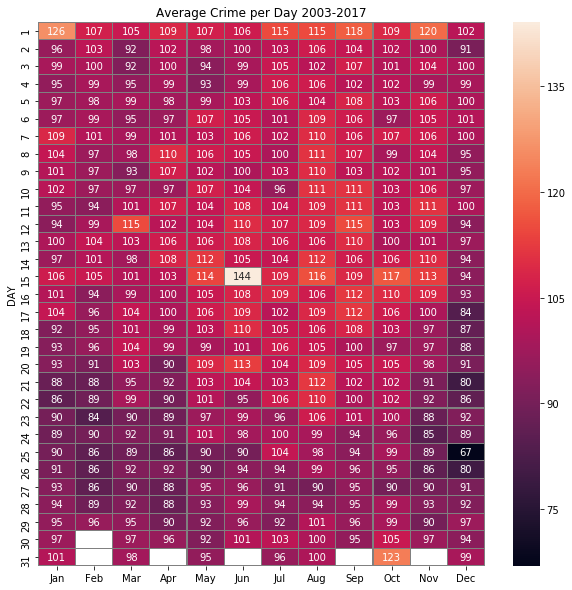

In [32]:
crimes_pivot_table = data.pivot_table(values='YEAR',index= 'DAY', columns='MONTH', aggfunc= len)

crimes_pivot_table_year_count = data.pivot_table(values='YEAR',index='DAY', columns='MONTH', aggfunc=lambda x: len(x.unique()))

crimes_average = round(crimes_pivot_table/crimes_pivot_table_year_count)
crimes_average.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
crimes_average


plt.figure(figsize = (10,10))
sns.heatmap(crimes_average, linecolor='grey',linewidths=0.1,annot = True, fmt=".0f")
plt.title('Average Crime per Day 2003-2017')
# # Using seaborn heatmap
# plt.figure(figsize=(7,9))
# plt.title('Average Number of Crime per Day and Month', fontsize=14)
# sns.heatmap(crimes_average.round(), cmap='seismic', linecolor='grey',linewidths=0.1, cbar=False, annot=True, fmt=".0f");